# MACHINE LEARNING 5 ASSIGNMENT

In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set. Following the code to get data into the environment:


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [56]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [57]:
features.shape

(506, 13)

In [59]:
targets.size

506

In [60]:
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x182792D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1859C1B0>]], dtype=object)

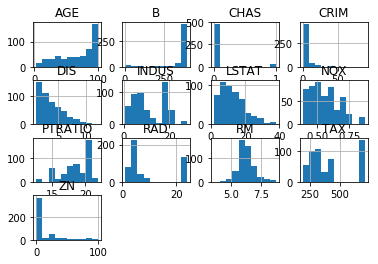

In [62]:
features.hist()

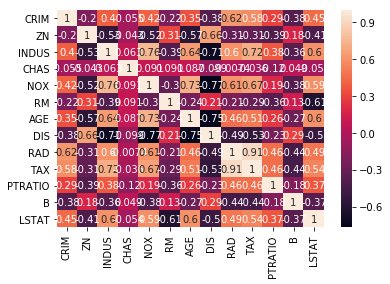

In [61]:
#Show the heatmap
cr=features.corr()
sns.heatmap(cr,annot=True)

In [64]:
#Create Train & Test Data
X_Train,X_Test,y_Train,y_Test = train_test_split(features,targets,test_size=0.25)

In [65]:
#Normalize the Independent variables
scaler = StandardScaler()
scaler.fit(X_Train)
scaler.transform(X_Train)
scaler.fit(X_Test)
scaler.transform(X_Test)

array([[ -5.41501298e-01,   2.72802323e+00,  -1.24491676e+00, ...,
         -1.62640221e+00,   3.95989147e-01,  -7.93160032e-01],
       [ -5.40529504e-01,  -5.21137096e-01,  -8.03569076e-01, ...,
          7.60240530e-01,   4.30709974e-01,  -7.09708857e-01],
       [ -5.25005282e-01,  -5.21137096e-01,  -1.12480315e+00, ...,
         -1.94416567e-01,  -1.02631309e-03,  -9.05387475e-01],
       ..., 
       [ -5.35069754e-01,  -5.21137096e-01,  -1.12480315e+00, ...,
         -1.94416567e-01,   4.30709974e-01,  -9.71572890e-01],
       [ -5.30911379e-01,   1.25113217e+00,  -1.04798631e+00, ...,
         -1.40943469e+00,   2.17504130e-01,  -1.12840355e+00],
       [ -5.28075097e-01,  -5.21137096e-01,   2.34592154e+00, ...,
          7.16847026e-01,   3.55389075e-01,   7.37737394e-01]])

In [68]:
#Run the Random forest model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=42)
regressor.fit(X_Train, y_Train)

# Score model
regressor.score(X_Train, y_Train)

0.98097135016315418

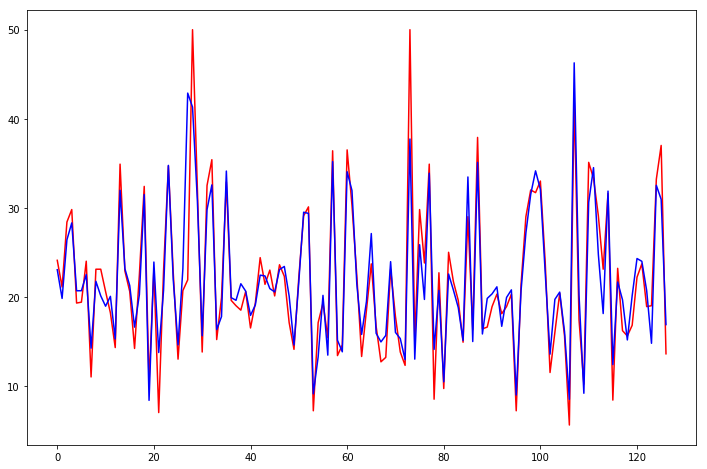

In [69]:
#Predict
y_pred = regressor.predict(X_Test)
# Plot y_test vs y_pred
plt.figure(figsize=(12,8))
plt.plot(y_Test, color='red')
plt.plot(y_pred, color='blue')
plt.show()